In [ ]:
#  %pip install patchify


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
from PIL import Image
import segmentation_models as sm
from sklearn.preprocessing import MinMaxScaler


Segmentation Models: using `keras` framework.


In [2]:
scaler = MinMaxScaler()

from smooth_tiled_predictions import predict_img_with_smooth_windowing



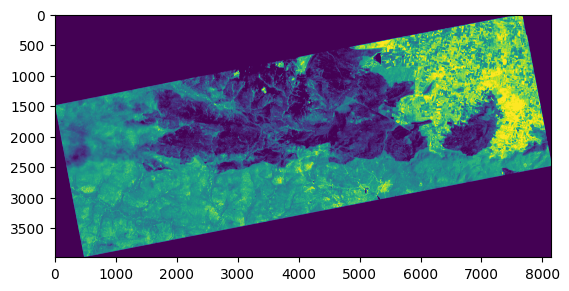

In [3]:
from keras.utils import to_categorical
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

img = cv2.imread("data/images/812.tif")
plt.imshow(img[:,:,2])
input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
image = preprocess_input(input_img)

# original_mask = cv2.imread("data/masks/812_mask.tif")
# original_mask = original_mask[:,:,0]  #Use only single channel...

# # # original_mask = to_categorical(original_mask, num_classes=2)

In [4]:
# import cv2
# import numpy as np

# # Load the TIFF image
# image_path = 'data/images/813.tif'
# image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# # Perform Histogram Equalization
# equalized_image = cv2.equalizeHist(image)

# # Save or display the equalized image
# cv2.imwrite('data/images/813_equal.tif', equalized_image)
# # Or display the image usingv matplotlib or other libraries


In [5]:
# import cv2
# import numpy as np

# # Load the TIFF image

# image = cv2.imread(image_path)

# # Convert to RGB format
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Split channels
# r, g, b = cv2.split(image_rgb)

# # Perform Histogram Equalization on each channel
# r_equalized = cv2.equalizeHist(r)
# g_equalized = cv2.equalizeHist(g)
# b_equalized = cv2.equalizeHist(b)

# # Merge the equalized channels back into an RGB image
# equalized_image = cv2.merge((r_equalized, g_equalized, b_equalized))

# # Save or display the equalized RGB image
# cv2.imwrite('data/images/813_equalColor.tif', cv2.cvtColor(equalized_image, cv2.COLOR_RGB2BGR))
# # Or display the image using matplotlib or other libraries


In [116]:
# import numpy as np

# # Assuming input_img is a NumPy array
# input_img = input_img.astype(np.float32)

# # Now, input_img has been converted to float32 data type.
image.shape

(3979, 8139, 3)

In [13]:
from keras.models import load_model
model = load_model("UnetLrwarmup_CatCrossENtropyJaccLoss_1e4AdamSoftmax50_resnet34.hdf5", compile=False)

In [7]:
# #UnetDropout_TotalLoss_SoftmaxAdam250LRscheduleDecay1e4
# Unetcustom_TotalLoss_SoftmaxAdam250LRschedule2000Decay1e4
# # UnetDropout_CE_SoftmaxAdam250LRscheduleDecay3e4


from keras.models import load_model
model = load_model("Unetpp_CE500.hdf5", compile=False)

In [8]:
seed=24
batch_size= 16
n_classes=2
patch_size=256

In [274]:
# import tensorflow as tf

# # Your code here to build the model and load data

# # Get the CPU and GPU devices
# cpu_device = tf.device('/CPU:0')
# gpu_device = tf.device('/GPU:0')
# input_data_gpu = tf.identity(input_img)

# # # Use the devices to copy tensors between CPU and GPU
# # with cpu_device:
# #     input_data_cpu = tf.constant(input_img, dtype=tf.float32)
# # with gpu_device:
# #     input_data_gpu = tf.identity(input_img)


In [275]:
# # Define your custom prediction function
# def custom_predict(img_batch_subdiv, model):
#     # Perform any preprocessing on the image batch if needed
#     # For example, you can normalize the batch to values between 0 and 1
# #     preprocessed_batch = img_batch_subdiv / 255.0

#     # Make the prediction using the model
#     predictions = model.predict(img_batch_subdiv)

#     return predictions


In [276]:
# import numpy as np

# # Define the function to predict a single patch
# def predict_patch(input_patch, model):
#     # Pad or crop the input_patch to size (256, 256, 3)
#     target_shape = (256, 256, 3)
#     input_shape = input_patch.shape
#     pad_height = max(target_shape[0] - input_shape[0], 0)
#     pad_width = max(target_shape[1] - input_shape[1], 0)
#     input_patch = np.pad(input_patch, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0.0)
#     input_patch = input_patch[:target_shape[0], :target_shape[1], :]

#     # Add a batch dimension to the input_patch
#     input_patch = np.expand_dims(input_patch, axis=0)
#     # Convert the input_patch to dtype float32
#     input_patch = input_patch.astype(np.float32)

#     # Predict on the patch
#     prediction = model.predict(input_patch)
#     return prediction

# # Define the function to make predictions for the entire image using smooth windowing
# def predict_img_with_smooth_windowing(input_img, window_size, subdivisions, nb_classes, pred_func):
#     img_height, img_width, _ = input_img.shape

#     # Initialize the prediction result
#     predictions_smooth = np.zeros((img_height, img_width, nb_classes), dtype=np.float64)

#     # Iterate over each patch using the given window_size
#     for x in range(0, img_width, window_size // subdivisions):
#         for y in range(0, img_height, window_size // subdivisions):
#             x_end = min(x + window_size, img_width)
#             y_end = min(y + window_size, img_height)

#             # Extract the current patch from the input image
#             input_patch = input_img[y:y_end, x:x_end]

#             # Predict the patch using the custom prediction function
#             prediction_patch = pred_func(input_patch)

#             # Determine the region of the prediction patch that corresponds to the input_patch
#             patch_height = y_end - y
#             patch_width = x_end - x

#             # Update the corresponding region in the predictions_smooth array
#             predictions_smooth[y:y_end, x:x_end] += prediction_patch[0, :patch_height, :patch_width, :]

#     return predictions_smooth

# # Example usage
# # Assuming 'image', 'patch_size', 'n_classes', and 'model' are defined elsewhere in your code
# predictions_smooth = predict_img_with_smooth_windowing(
#     image,
#     window_size=patch_size,
#     subdivisions=2,
#     nb_classes=n_classes,
#     pred_func=lambda img_batch_subdiv: predict_patch(img_batch_subdiv, model)
# )


In [277]:
# %pip install scipy

In [278]:
predictions_smooth = predict_img_with_smooth_windowing(
    image,
    window_size=patch_size,
    subdivisions=2,  
    nb_classes=2,
    pred_func=(
        lambda img_batch_subdiv: model.predict((img_batch_subdiv), batch_size=1)
    )
)

  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

2048/2048 [==============================] - 10s 5ms/step


 12%|██████████▌                                                                         | 1/8 [00:18<02:06, 18.07s/it]

2048/2048 [==============================] - 10s 5ms/step


 25%|█████████████████████                                                               | 2/8 [00:38<01:56, 19.38s/it]

2048/2048 [==============================] - 10s 5ms/step


 38%|███████████████████████████████▌                                                    | 3/8 [00:56<01:33, 18.68s/it]

2048/2048 [==============================] - 10s 5ms/step


 50%|██████████████████████████████████████████                                          | 4/8 [01:14<01:14, 18.55s/it]

2048/2048 [==============================] - 10s 5ms/step


 62%|████████████████████████████████████████████████████▌                               | 5/8 [01:33<00:55, 18.64s/it]

2048/2048 [==============================] - 10s 5ms/step


 75%|███████████████████████████████████████████████████████████████                     | 6/8 [01:58<00:41, 20.74s/it]

2048/2048 [==============================] - 10s 5ms/step


 88%|█████████████████████████████████████████████████████████████████████████▌          | 7/8 [02:19<00:20, 20.86s/it]

2048/2048 [==============================] - 10s 5ms/step


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:37<00:00, 19.73s/it]


1/1 [==============================] - 0s 24ms/step


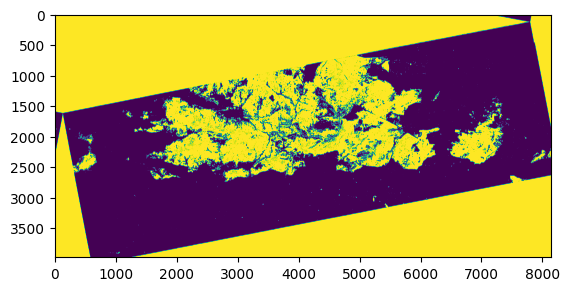

In [14]:
import numpy as np
import cv2
import segmentation_models as sm

def preprocess_patch(patch, preprocess_input):
    """
    Apply preprocessing to a single patch.
    """
    patch = patch / 255.0  # Example normalization
    patch = preprocess_input(patch)
    return patch

def predict_img_with_smooth_windowing(image, window_size, subdivisions, nb_classes, pred_func, preprocess_input):
    """
    Predict segmentation for large images using a sliding window approach with smoothing.
    """
    pad_size = window_size // 2
    image_padded = np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='reflect')
    
    full_predictions = np.zeros(image.shape[:2] + (nb_classes,))
    count_predictions = np.zeros(image.shape[:2] + (nb_classes,))
    
    step_size = window_size // subdivisions
    
    for i in range(0, image_padded.shape[0] - window_size + 1, step_size):
        for j in range(0, image_padded.shape[1] - window_size + 1, step_size):
            patch = image_padded[i:i+window_size, j:j+window_size, :]
            patch = preprocess_patch(patch, preprocess_input)
            
            # Predict for the patch
            prediction = pred_func(np.expand_dims(patch, axis=0)).squeeze()
            
            # Ensure prediction dimensions match the window size
            if prediction.shape != (window_size, window_size, nb_classes):
                # Resize prediction if dimensions do not match
                prediction = cv2.resize(prediction, (window_size, window_size), interpolation=cv2.INTER_LINEAR)
            
            # Calculate the overlap area to avoid adding values outside the current window
            end_i = min(i + window_size, full_predictions.shape[0])
            end_j = min(j + window_size, full_predictions.shape[1])
            
            # Update full_predictions and count_predictions within the valid overlap area
            full_predictions[i:end_i, j:end_j, :] += prediction[:end_i-i, :end_j-j, :]
            count_predictions[i:end_i, j:end_j, :] += 1

    # Normalize the predictions
    full_predictions /= np.maximum(count_predictions, 1)  # Avoid division by zero
    
    return full_predictions

# Example usage
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

# Load image
image = cv2.imread("data/images/812.tif")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Ensure image is in RGB format

# Define parameters
patch_size = 256
nb_classes = 2

# Define the prediction function
def predict_func(img_batch_subdiv):
    return model.predict(img_batch_subdiv, batch_size=1)

# Perform prediction
predictions_smooth = predict_img_with_smooth_windowing(
    image,
    window_size=patch_size,
    subdivisions=2,
    nb_classes=nb_classes,
    pred_func=predict_func,
    preprocess_input=preprocess_input
)

# Visualize or save predictions as needed
import matplotlib.pyplot as plt

plt.imshow(np.argmax(predictions_smooth, axis=-1))  # Display the most likely class
plt.show()


In [15]:
final_prediction = np.argmax(predictions_smooth, axis=2)
# test= np.squeeze(predictions_smooth)
final_prediction.shape

(3979, 8139)

(-0.5, 8138.5, 3978.5, -0.5)

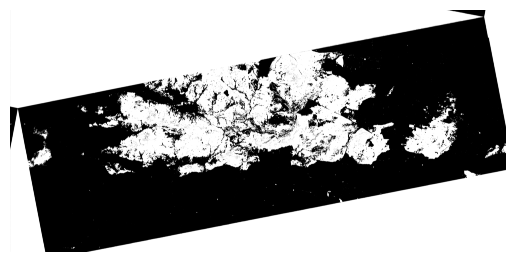

In [16]:
plt.imshow(final_prediction, cmap='gray')
plt.axis('off')
# plt.savefig('data/res/_seg.jpg', bbox_inches='tight', pad_inches=0) 


In [12]:
import matplotlib.pyplot as plt
import imageio
imageio.imsave('data/res/Unetlatest_BinaryCrossENtropyJaccLoss_1e4AdamSoftmax50_resnet34NewPred_812_Seg.tif', final_prediction)
temp_img = cv2.imread("data/images/812.tif", cv2.IMREAD_UNCHANGED)
imageio.imsave('data/res/812.tif', temp_img[:, :, [2,1,0]]) 


### Refining result

In [ ]:
import cv2
import numpy as np

# Load the TIFF image
image_path = 'data/images/812.tif'
image = cv2.imread(image_path)

# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(image_rgb)

# Perform Histogram Equalization on each channel
r_equalized = cv2.equalizeHist(r)
g_equalized = cv2.equalizeHist(g)
b_equalized = cv2.equalizeHist(b)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((r_equalized, g_equalized, b_equalized))

# Perform noise removal (e.g., Gaussian blur or median blur)
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)
# Or use median blur: denoised_image = cv2.medianBlur(equalized_image, 5)

# Save or display the denoised RGB image
cv2.imwrite('data/images/812_deionized.tif', cv2.cvtColor(denoised_image, cv2.COLOR_RGB2BGR))
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the TIFF image
image_path = 'data/images/812.tif'
image = cv2.imread(image_path)

# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(image_rgb)

# Perform Histogram Equalization on each channel
r_equalized = cv2.equalizeHist(r)
g_equalized = cv2.equalizeHist(g)
b_equalized = cv2.equalizeHist(b)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((r_equalized, g_equalized, b_equalized))

# Perform noise removal (e.g., Gaussian blur or median blur)
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Convert the denoised image to grayscale
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Threshold the grayscale image to create a mask for dark pixels
_, mask = cv2.threshold(gray_image, 30, 255, cv2.THRESH_BINARY_INV)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the denoised image
contour_image = denoised_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, thickness 2

# Save or display the contour image
cv2.imwrite('data/images/812_feature.tif', cv2.cvtColor(contour_image, cv2.COLOR_RGB2BGR))
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the TIFF image
image_path = 'data/images/812.tif'
image = cv2.imread(image_path)

# Convert to RGB format
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split channels
r, g, b = cv2.split(image_rgb)

# Perform Histogram Equalization on each channel
r_equalized = cv2.equalizeHist(r)
g_equalized = cv2.equalizeHist(g)
b_equalized = cv2.equalizeHist(b)

# Merge the equalized channels back into an RGB image
equalized_image = cv2.merge((r_equalized, g_equalized, b_equalized))

# Perform noise removal (e.g., Gaussian blur or median blur)
denoised_image = cv2.GaussianBlur(equalized_image, (5, 5), 0)

# Convert the denoised image to grayscale
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_RGB2GRAY)

# Threshold the grayscale image to create a mask for black pixels
_, mask = cv2.threshold(gray_image, 10, 255, cv2.THRESH_BINARY)

# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the denoised image
contour_image = denoised_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Green color, thickness 2

# Save or display the contour image
cv2.imwrite('data/images/812_feature.tif', cv2.cvtColor(contour_image, cv2.COLOR_RGB2BGR))
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the TIFF image
image_path = 'data/images/812.tif'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Perform adaptive thresholding to capture dark regions
adaptive_threshold = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Save the thresholded image
cv2.imwrite('data/images/812_feature.tif', adaptive_threshold)
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the TIFF image
image_path = 'data/images/812.tif'
image = cv2.imread(image_path)

# Convert to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Histogram Equalization
equalized_image = cv2.equalizeHist(gray_image)

# Perform adaptive thresholding to capture dark regions
adaptive_threshold = cv2.adaptiveThreshold(equalized_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)

# Save the thresholded image
cv2.imwrite('data/images/812_feature.tif', adaptive_threshold)
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the thresholded image
thresholded_image = cv2.imread('data/images/812_feature.tif', cv2.IMREAD_GRAYSCALE)

# Find contours in the thresholded image
contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contours_image = image.copy()
cv2.drawContours(contours_image, contours, -1, (0, 255, 0), 2)  # Green color, thickness 2

# Save or display the image with detected contours
cv2.imwrite('data/images/812_features_with_contours.tif', contours_image)
# Or display the image using matplotlib or other libraries


In [ ]:
import cv2

# Load the adaptive thresholded image
adaptive_thresholded_image = cv2.imread('data/images/812_feature.tif', cv2.IMREAD_GRAYSCALE)

# Invert the adaptive thresholded image to create the binary mask
binary_mask = cv2.bitwise_not(adaptive_thresholded_image)

# Save or display the binary mask
cv2.imwrite('data/images/812_binary_mask.tif', binary_mask)
# Or display the mask using matplotlib or other libraries


In [ ]:
import cv2
image_path = 'data/images/813.tif'
image = cv2.imread(image_path)
# Load the mask
mask = cv2.imread('data/masks/813_mask.tif', cv2.IMREAD_GRAYSCALE)

# Ensure the mask and image have the same dimensions
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

# Convert the mask to binary (black and white)
_, binary_mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

# Save or display the binary mask
cv2.imwrite('data/images/813_binary_mask.tif', binary_mask)
# Or display the binary mask using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the original mask
mask = cv2.imread('data/masks/812_mask.tif', cv2.IMREAD_GRAYSCALE)

# Ensure the mask and image have the same dimensions
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

# Perform morphological operations (erosion and dilation) to improve the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

# Convert the mask to binary (black and white)
_, binary_mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)

# Save or display the improved binary mask
cv2.imwrite('data/images/812_improved_binary_mask.tif', binary_mask)
# Or display the improved binary mask using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the original mask
mask = cv2.imread('data/masks/812_mask.tif', cv2.IMREAD_GRAYSCALE)

# Ensure the mask and image have the same dimensions
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

# Perform morphological operations (erosion and dilation) to improve the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

# Apply Canny edge detection to the mask
edges = cv2.Canny(mask, 30, 100)

# Convert the edges to binary (black and white)
binary_edges = cv2.threshold(edges, 128, 255, cv2.THRESH_BINARY)[1]

# Save or display the improved binary edges
cv2.imwrite('data/images/812_improved_binary_edges.tif', binary_edges)
# Or display the improved binary edges using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the original mask
mask = cv2.imread('data/masks/812_mask.tif', cv2.IMREAD_GRAYSCALE)

# Ensure the mask and image have the same dimensions
if mask.shape[:2] != image.shape[:2]:
    mask = cv2.resize(mask, (image.shape[1], image.shape[0]))

# Perform morphological operations (erosion and dilation) to improve the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.erode(mask, kernel, iterations=1)
mask = cv2.dilate(mask, kernel, iterations=1)

# Apply Canny edge detection to the mask
edges = cv2.Canny(mask, 30, 100)

# Find contours in the edges image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw filled contours
filled_contours = np.zeros_like(mask)

# Fill all contours with white
cv2.drawContours(filled_contours, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Save or display the filled contours
cv2.imwrite('data/images/812_filled_contours_all.tif', filled_contours)
# Or display the filled contours using matplotlib or other libraries


In [ ]:
import cv2
import numpy as np

# Load the original mask and the input mask
original_mask = cv2.imread('data/masks/812_mask.tif', cv2.IMREAD_GRAYSCALE)
input_mask = cv2.imread('data/masks/813_UnetppLSTMDropout_BCE_SigmoidAdam50LRschedule2000Decay1e4_Seg.tif', cv2.IMREAD_GRAYSCALE)

# Check if masks are loaded correctly
if original_mask is None or input_mask is None:
    print("Error: Unable to load one or both masks.")
else:
    # Ensure the masks have the same dimensions
    if original_mask.shape[:2] != input_mask.shape[:2]:
        original_mask = cv2.resize(original_mask, (input_mask.shape[1], input_mask.shape[0]))

    # Threshold both masks to binary (black and white)
    _, original_binary = cv2.threshold(original_mask, 128, 255, cv2.THRESH_BINARY)
    _, input_binary = cv2.threshold(input_mask, 128, 255, cv2.THRESH_BINARY)

    # Perform element-wise AND operation on the masks to combine them
    output_mask = cv2.bitwise_and(original_binary, input_binary)

    # Save or display the output mask
    cv2.imwrite('data/images/812_output_mask.tif', output_mask)
    # Or display the output mask using matplotlib or other libraries
